<a href="https://colab.research.google.com/github/gopalchamy/Decision_Tree/blob/main/Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
from google.colab import files
import seaborn as sns
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

Saving housing.csv to housing (1).csv


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


In [9]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [10]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

print("MSE (Unpruned):", mean_squared_error(y_test, y_pred))
print("R2 Score (Unpruned):", r2_score(y_test, y_pred))


MSE (Unpruned): 4865868836.95906
R2 Score (Unpruned): 0.6286755571919975


In [12]:
dt_pruned = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=50,
    random_state=42
)

dt_pruned.fit(X_train, y_train)

y_pred_pruned = dt_pruned.predict(X_test)

print("MSE (Pre-Pruned):", mean_squared_error(y_test, y_pred_pruned))
print("R2 Score (Pre-Pruned):", r2_score(y_test, y_pred_pruned))


MSE (Pre-Pruned): 5104086596.751853
R2 Score (Pre-Pruned): 0.610496670771929


In [13]:
path = dt_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

dt_post_pruned = DecisionTreeRegressor(
    ccp_alpha=ccp_alphas[10],
    random_state=42
)

dt_post_pruned.fit(X_train, y_train)

y_pred_post = dt_post_pruned.predict(X_test)

print("MSE (Post-Pruned):", mean_squared_error(y_test, y_pred_post))
print("R2 Score (Post-Pruned):", r2_score(y_test, y_pred_post))


MSE (Post-Pruned): 4865868960.190777
R2 Score (Post-Pruned): 0.6286755477879321


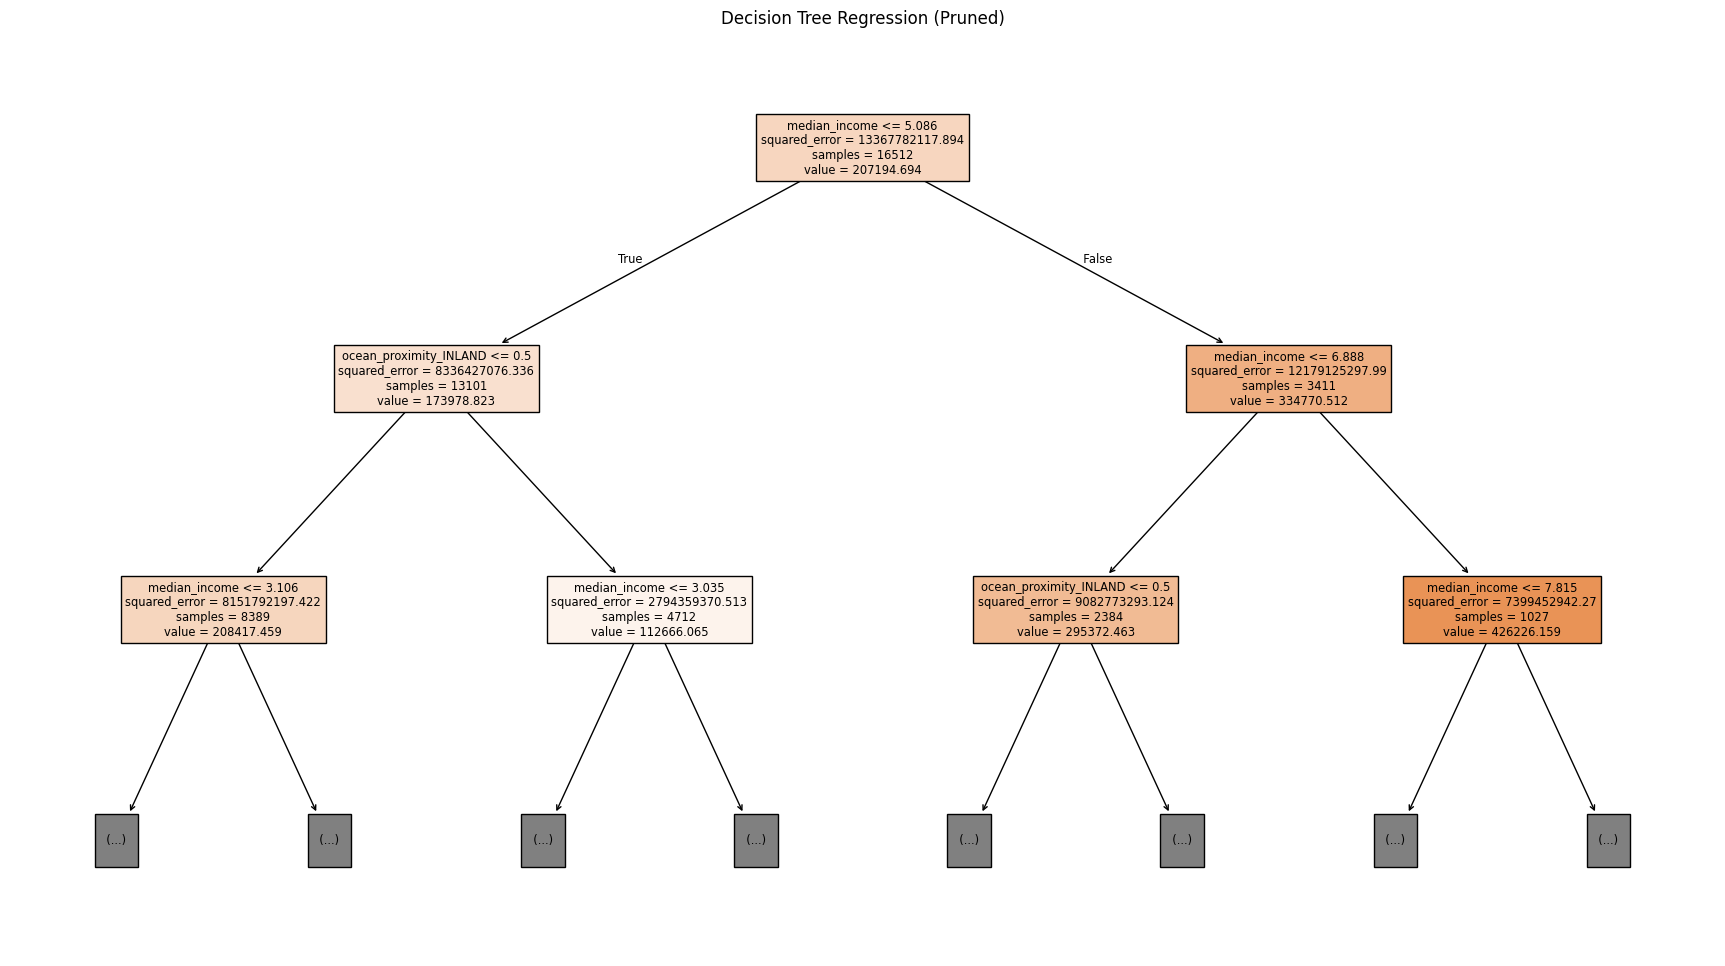

In [15]:
plt.figure(figsize=(22, 12))
plot_tree(
    dt_pruned,
    feature_names=X.columns,
    filled=True,
    max_depth=2
)
plt.title("Decision Tree Regression (Pruned)")
plt.show()


In [16]:
importances = dt_pruned.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
7,median_income,0.706738
8,ocean_proximity_INLAND,0.220655
0,longitude,0.031499
2,housing_median_age,0.019292
1,latitude,0.017814
4,total_bedrooms,0.004002
3,total_rooms,0.000000
5,population,0.000000
6,households,0.000000
9,ocean_proximity_ISLAND,0.000000
